In [233]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [234]:
# loading data
observations=pd.read_csv('observations.csv')
species=pd.read_csv('species_info.csv')

### Data Wrangling ###

#### Dataframe Observations ###

In [235]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [236]:
# rename column header which is identific with df name
observations.rename(columns={'observations': 'obs_num'}, inplace=True)
observations.head()

,scientific_name,park_name,obs_num
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [237]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   obs_num          23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [238]:
# number of rows
observations.shape

(23296, 3)

In [239]:
# data types
observations.dtypes

scientific_name    object
park_name          object
obs_num             int64
dtype: object

In [240]:
# number of unique values in each column
observations.nunique()

scientific_name    5541
park_name             4
obs_num             304
dtype: int64

In [241]:
observations.describe(include = 'all')

,scientific_name,park_name,obs_num
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


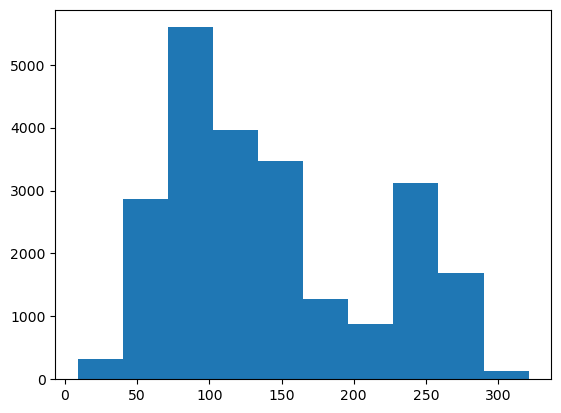

<Figure size 640x480 with 0 Axes>

In [242]:
plt.hist(observations.obs_num)
plt.show()
plt.clf()

In [243]:
observations['park_name'].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [244]:
# finding missing values
observations.isna().sum()

scientific_name    0
park_name          0
obs_num            0
dtype: int64

In [245]:
# finding missing values in column with datatype int64
observations['obs_num']=observations['obs_num'].where(observations['obs_num']!=0, np.nan)
observations.isna().sum()

scientific_name    0
park_name          0
obs_num            0
dtype: int64

In [246]:
# finding duplicates
observations.duplicated().value_counts()

False    23281
True        15
dtype: int64

##### Description of observations dataframe #####
In the dataframe observations there are 23296 records in 3 columns: 
- scientific_name: Latin name of the plant/animal
- park_name: locating of the observations
- obs_num: number of observations  

The first two columns' datatype is objective, they are names, the third column (which is a count) has intreger values, so there is no need to change datatype.  
In the dataframe, there is 5541 different creatures listed in 4 national parks (Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, Yellowstone National Park). It might be useful to cut the end-string of the par_name (' National Park) because it will be shorter. 
The minimum of observations is 9, the maximum value is 321. In the distribution, 2 peaks can be seen on the histoplot. The data is right-skewed.
Probably, there is no missing value in the dataframe. 
There is 15 duplicated observations.

#### Dataframe Species ###

In [247]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [248]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [249]:
# number of rows
species.shape

(5824, 4)

In [250]:
# data types
species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [251]:
species.describe(include = 'all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [252]:
# number of unique values in each column
species.nunique()

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

In [253]:
# values of category
species['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [254]:
# unique values in column coservation_status
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [255]:
# finding missing values
species.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [256]:
# finding duplicates
species.duplicated().value_counts()

False    5824
dtype: int64

##### Description of species dataframe #####

In the dataframe, there is 5824 records in 4 column:
- category: taxonomy of species. There are 7 category: 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'
- scientific_name: Latin name of species
- common_names: common used names of species
- conservation_status: in the column there are 4 values, and a big percentof them is NaN. The other values of the variable (Species of Concern', 'Endangered', 'Threatened', 'In Recovery') mean that the animal/plant is in kind of danger. Maybe the data is missing structurally, and means that the conservation status is 'not endangered' 

The datatype for all columns is object. It can be maybe usful to change the datatype of columns conversation_status and category into categorical datatype to scale the values.
There are not any duplicated records in the dataframe.

### Data Cleaning and Organizing ###

#### Tasks ####
- [x] characterizing missingness in column conservation_status (df species)
- [x] fill data in df species 
- [x] change conservation_status dtype (df species)
- [x] change category dtype (df species)
- [x] exploring and dropping duplications in df observations  
- [x] cut ' National Park' - observations.park_name

In [257]:
# characterizing missingness in column conservation_status
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [258]:
# count of categories not in danger
pd.crosstab(species['category'], species['conservation_status'].isna(),rownames=['category'], colnames=['conservation is na'])

conservation is na,False,True
category,,
Amphibian,7,73
Bird,79,442
Fish,11,116
Mammal,38,176
Nonvascular Plant,5,328
Reptile,5,74
Vascular Plant,46,4424


In [259]:
# filling data
species['conservation_status'].fillna(value = 'Not Endangered', inplace = True)
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered
1,Mammal,Bos bison,"American Bison, Bison",Not Endangered
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Endangered
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Endangered
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Endangered


In [260]:
# exploring duplications
duplicates = observations[observations.duplicated(keep=False)].sort_values(by = ['scientific_name'])
print(duplicates)

              scientific_name                            park_name  obs_num
513             Arctium minus               Yosemite National Park      162
10674           Arctium minus               Yosemite National Park      162
4527   Botrychium virginianum            Yellowstone National Park      232
20294  Botrychium virginianum            Yellowstone National Park      232
19392       Cichorium intybus            Yellowstone National Park      266
14142       Cichorium intybus            Yellowstone National Park      266
7263   Echinochloa crus-galli  Great Smoky Mountains National Park       62
1454   Echinochloa crus-galli  Great Smoky Mountains National Park       62
1020     Eleocharis palustris  Great Smoky Mountains National Park       62
12381    Eleocharis palustris  Great Smoky Mountains National Park       62
1032      Hesperis matronalis                  Bryce National Park      124
13372     Hesperis matronalis                  Bryce National Park      124
4178     Mon

In [261]:
# drop duplicates
observations = observations.drop_duplicates()
duplicates = observations[observations.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [scientific_name, park_name, obs_num]
Index: []


In [262]:
# cut 'National Park' - observations
observations['park_name']=observations['park_name'].str.strip(' National Park')
observations.head()

,scientific_name,park_name,obs_num
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce,84
4,Githopsis specularioides,Great Smoky Mountains,85


In [263]:
# changing conservation_status dtype (df species)
# species['conservation_status']=pd.Categorical(species['conservation_status'], ['Not Endangered', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery'], ordered=True)

In [264]:
# changing category dtype (df species)
species['category']=pd.Categorical(species['category'], ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], ordered=True)

### Purposes of Analysis ###

#### Questions ####
-  **are there any patterns or themes to the types of species that become endangered?**
- relation of category and endangered status
- relation of endangered status and park name

At first, I have to analyze the data of dataframe species bcause there are basic informations about conservation status. It could be interesting to see the relation between categories and conservation status:
- what are the proportions of categories to each other, which is the most representative category in this data,
- how is the proportion of species in somehow endangered status to all species
- how representative are the grades among conservation status
- is there a connection between categories and being in somehow endangered

#### Tasks ####
- [x] create a df for species in somehow danger
- [x] create a bar chart about the number each species in danger grouped by category
- [ ] chi-square statistic for categories and conservation_status
- [x] merge the 2 dfs
- [x] create a chart about the number each species in danger grouped by park name

### Analysing of Data Species ####

#### Inspecting Conservation Status ####


In [265]:
# create a df for species in somehow danger
species_in_danger = species[species['conservation_status']!='Not Endangered']
# species_in_danger.rename(columns={'index': 'original_index'}, inplace=True)
species_in_danger.head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


In [266]:
species_in_danger.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [267]:
len(species_in_danger.conservation_status)

191

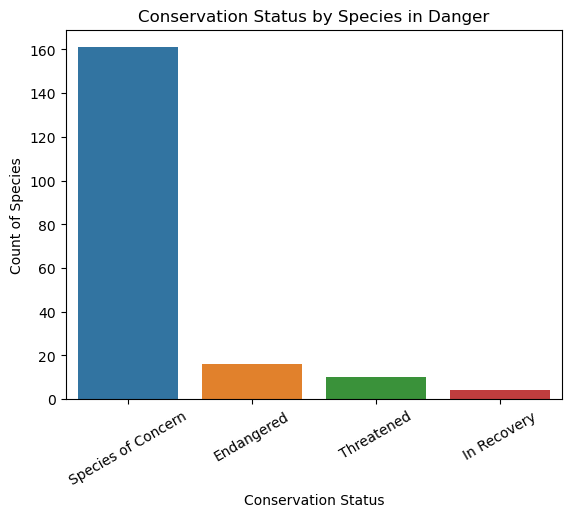

<Figure size 640x480 with 0 Axes>

In [268]:
sns.countplot(x='conservation_status', data=species_in_danger)
plt.xticks(rotation=30)
plt.title('Conservation Status by Species in Danger')
plt.xlabel('Conservation Status')
plt.ylabel('Count of Species')
plt.show()
plt.clf()

The most species of endangered status is by concerned grade, there are 161 species in this category of 191. This is 84 %!
There are 16 species which are really "endangered, it is only 8 % of all species in danger. 10 species are threatened and 4 in recovery, these grades have really small numbers.
It seems to be  effective to concentrate the grades of "speices of concern" and "endangered".

#### Inspecting Category ####

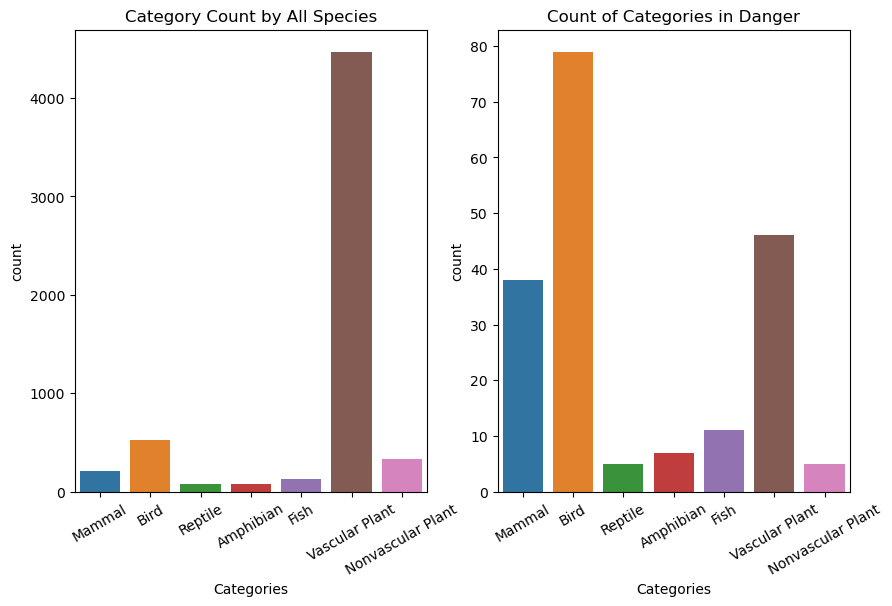

<Figure size 640x480 with 0 Axes>

In [269]:
# category count all species vs species in danger 
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x='category', data=species)
plt.xticks(rotation=30)
plt.title('Category Count by All Species')
plt.xlabel('Categories')

plt.subplot(1,2,2)
sns.countplot(x='category', data=species_in_danger)
plt.xticks(rotation=30)
plt.title('Count of Categories in Danger')
plt.xlabel('Categories')

plt.show()
plt.clf()

In [270]:
species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [271]:
species_in_danger.category.value_counts()

Bird                 79
Vascular Plant       46
Mammal               38
Fish                 11
Amphibian             7
Reptile               5
Nonvascular Plant     5
Name: category, dtype: int64

Among species in danger, the largest number belongs to the birds (79), followed by vascular plants (46) and mammal (38). In all data birds are on second place, vascular plants are the most represented category. Nonvascular plants are at the third position in all data, among endangered species, they have the least count.  
The most representative categories are mammals, birds and vascular plants.
If we look at the proportion of the grades of "somehow in danger", we can see, that in endangered status, the most are mammal (7 of 16, 44%) and birds (4 of 16, 25%). In status "species of concern" we can find 72 birds, 43 vascular plants and 28 mammals - the other values are much smaller.  
Now, I want to investigate, how relate the percentage of species in danger to all species.

In [272]:
species.category.unique()

['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']
Categories (7, object): ['Mammal' < 'Bird' < 'Reptile' < 'Amphibian' < 'Fish' < 'Vascular Plant' < 'Nonvascular Plant']

In [273]:
# percent of species in danger in all data
d = {'category': ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], 
     'total_num': [214, 521, 79, 80, 127, 4470, 333], 
     'in_danger_num':[38, 79, 5, 7, 11, 46, 5]}
percent_in_danger = pd.DataFrame(data = d)
percent_in_danger['percent']=percent_in_danger['in_danger_num']/percent_in_danger['total_num']*100
print(percent_in_danger.sort_values('percent', ascending=False))


            category  total_num  in_danger_num    percent
0             Mammal        214             38  17.757009
1               Bird        521             79  15.163148
3          Amphibian         80              7   8.750000
4               Fish        127             11   8.661417
2            Reptile         79              5   6.329114
6  Nonvascular Plant        333              5   1.501502
5     Vascular Plant       4470             46   1.029083


<Figure size 1000x1000 with 0 Axes>

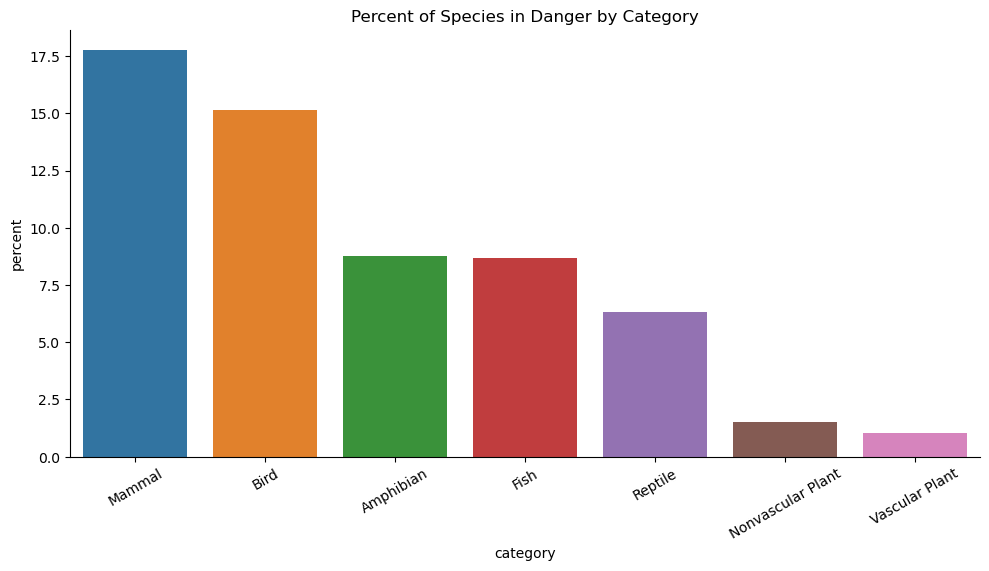

<Figure size 640x480 with 0 Axes>

In [274]:
# plotting percentage of endangered species by category
plt.figure(figsize=(10, 10))
sns.catplot(x = 'category', y = 'percent', 
            data = percent_in_danger, 
            kind = 'bar', 
            aspect =2,
            order =percent_in_danger.sort_values('percent', ascending=False).category)

plt.xticks(rotation=30)

plt.title('Percent of Species in Danger by Category')
plt.show()
plt.clf()

#### Relation between Category and Conservation Status ####

In [275]:
# conservation status and categories
cat_conservation=species_in_danger.groupby(['category', 'conservation_status']).agg({'scientific_name': 'count'})
cat_conservation_pivot = pd.pivot_table(
data=cat_conservation,
    values= 'scientific_name',
index='conservation_status',
columns='category',
aggfunc='sum')
cat_conservation_pivot

category,Mammal,Bird,Reptile,Amphibian,Fish,Vascular Plant,Nonvascular Plant
conservation_status,,,,,,,
Endangered,7,4,0,1,3,1,0
In Recovery,1,3,0,0,0,0,0
Species of Concern,28,72,5,4,4,43,5
Threatened,2,0,0,2,4,2,0


If we inspect the percentage of species in danger to all species by category, we see that mammals have the largest percent (17.75%), followed by birds (15.16%). The third and 4th positioned categories (amphibians' and fishes) have about 9 % endangered species. Only 1 % of vascular plants is in danger. 
From that we can say, that maybe mammals and birds are the most endangered categories. However, most of them are "species of concern" (72 birds, 28 mammals). Really endangered are 7 mammals and 4 birds of 16 endangered species.  
I want to investigate the relation of the two variables category and conservaton status wit chi-square test.
From variable conservation status I want to test the values "in danger' and "not in danger", from category "mammal" and "bird", principally.

##### Chi-square Tests #####

In [276]:
# create bool column: in_danger (True if the animal/plant is somehow in danger)
species['in_danger']=species.conservation_status.apply(lambda x: False if x == 'Not Endangered' else True)
species.head(10)

,category,scientific_name,common_names,conservation_status,in_danger
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False
1,Mammal,Bos bison,"American Bison, Bison",Not Endangered,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Endangered,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Endangered,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Endangered,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Not Endangered,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Not Endangered,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
9,Mammal,Canis rufus,Red Wolf,Endangered,True


In [277]:
# contingency tables: categories- in_danger in species
categories_in_danger_freq= pd.crosstab(species.category, species.in_danger)
categories_in_danger_freq

in_danger,False,True
category,,
Mammal,176,38
Bird,442,79
Reptile,74,5
Amphibian,73,7
Fish,116,11
Vascular Plant,4424,46
Nonvascular Plant,328,5


In [278]:
#proportions
categories_in_danger_prop = categories_in_danger_freq/len(species)*100
categories_in_danger_prop

in_danger,False,True
category,,
Mammal,3.021978,0.652473
Bird,7.589286,1.356456
Reptile,1.270604,0.085852
Amphibian,1.253434,0.120192
Fish,1.991758,0.188874
Vascular Plant,75.961538,0.789835
Nonvascular Plant,5.631868,0.085852


In [279]:
# marginals - in_danger
in_danger_marginals=categories_in_danger_prop.sum(axis=0)
in_danger_marginals

in_danger
False    96.720467
True      3.279533
dtype: float64

From the propotional contingency table we can see, that from all species, there are 3 % species in danger, 97 % not.  1% of all species are birds in danger, and 0.65% are mammals in danger.

In [280]:
# chi2 contingency for all category
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(categories_in_danger_freq)
print('expected contingency table:')
print(expected)
print(f'chi2 = {chi2}')
print(f'p-value = {pval}')

expected contingency table:
[[2.06981799e+02 7.01820055e+00]
 [5.03913633e+02 1.70863668e+01]
 [7.64091690e+01 2.59083104e+00]
 [7.73763736e+01 2.62362637e+00]
 [1.22834993e+02 4.16500687e+00]
 [4.32340488e+03 1.46595124e+02]
 [3.22079155e+02 1.09208448e+01]]
chi2 = 469.5114395774195
p-value = 3.095911909904608e-98


In [281]:
# comparing expected and observed values
# creating df for expected values
category=['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant']

expected_values=pd.DataFrame(expected, columns=['expected_false', 'expected_true'])
expected_values.insert(loc=0, column='category', value=category)

# creating df for observed values
# categories_in_danger_freq = pd.DataFrame(data=categories_in_danger_freq, 
#                                          columns=['observed_false', 'observed_true'])
# categories_in_danger_freq.insert(loc=0, column='category', value=category)

# merge dfs
# observed_expected=pd.merge(
#     left=categories_in_danger_freq, 
#     right=expected_values,
#     how='inner'
# )
# difference between observed and expected values
observed_expected['difference']=observed_expected['expected_false']-observed_expected['observed_false']
observed_expected

,category,observed_false,observed_true,expected_false,expected_true,difference
0,Mammal,176,38,206.981799,7.018201,30.981799
1,Bird,442,79,503.913633,17.086367,61.913633
2,Reptile,74,5,76.409169,2.590831,2.409169
3,Amphibian,73,7,77.376374,2.623626,4.376374
4,Fish,116,11,122.834993,4.165007,6.834993
5,Vascular Plant,4424,46,4323.404876,146.595124,-100.595124
6,Nonvascular Plant,328,5,322.079155,10.920845,-5.920845


From the table above can be seen the observed values, the expected values which was calculated with the chi2_contingency method, and the differences between the observed and expected values. The largest difference can be observed by vascular plants, this can be caused by the low proportion of being in danger of vascular plants. The second and third largest differences are by birds(around 62) and mammals (around 31). The smallest difference is by category reptile (2.4).  
As next step, I will test mammal vs bird, mammal vs reptile and bird vs reptile to see whether I can see some association between the values. The significant treshold for the p-value is 0.05, for the chi2-value 4. 

##### Mammal vs Birds #####

In [282]:
# contingency table mammal_bird
contingency_mammal_bird=[[176, 38], [442, 79]]
chi2, pval, dof, expected = chi2_contingency(contingency_mammal_bird)
print('expected contingency table:')
print(expected)
print(f'chi2 = {chi2}')
print(f'p-value = {pval}')

expected contingency table:
[[179.93469388  34.06530612]
 [438.06530612  82.93469388]]
chi2 = 0.5810483277947567
p-value = 0.445901703047197


The p-value is 0.44 which is larger than the genereal significance treshold 0.05, so there does not seem to be a relation between birds and mammals being in danger. The chi-square value with 0.58 is also smaller than the in general expected value for 2x2 tables (around 4).

##### Mammal vs Reptile #####

In [283]:
# contingency table mammal_reptile
contingency_mammal_reptile=[[176, 38], [74, 5]]
chi2, pval, dof, expected = chi2_contingency(contingency_mammal_reptile)
print('expected contingency table:')
print(expected)
print(f'chi2 = {chi2}')
print(f'p-value = {pval}')

expected contingency table:
[[182.59385666  31.40614334]
 [ 67.40614334  11.59385666]]
chi2 = 5.139702724228909
p-value = 0.02338465214871547


The p-value is 0.02 which is smaller than the genereal significance treshold 0.05, the chi-square value with 5.13 is also greater than the in general expected value for 2x2 tables (around 4). It seems to be a relation between mammal and reptile being in danger: mammal have significant greater probability of being in danger than reptile. 

##### Birds vs Reptile #####

In [284]:
# contingency table bird_reptile
contingency_bird_reptile=[[442, 79], [74, 5]]
chi2, pval, dof, expected = chi2_contingency(contingency_bird_reptile)
print('expected contingency table:')
print(expected)
print(f'chi2 = {chi2}')
print(f'p-value = {pval}')

expected contingency table:
[[448.06  72.94]
 [ 67.94  11.06]]
chi2 = 3.742911272135716
p-value = 0.053031969869125097


The p-value is in this case 0.053 which is the significance treshold. The chi2-value is 3.74 which is a little bit smaller than 4. The relation between birds and reptile being in danger is maybe significant, but the relation is weak.

### Inspecting All Data ###

In the next section I would like to inspect in wichich national park more endangered species occure. At first, I need to merge both datasets, than clean the merged dataset if needed.

In [285]:
# outer merge species and observations
all_data = pd.merge(left=species, right=observations, left_on='scientific_name', right_on='scientific_name', how='outer')
all_data.head()


,category,scientific_name,common_names,conservation_status,in_danger,park_name,obs_num
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False,Bryce,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False,Yellowstone,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False,Great Smoky Mountains,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Endangered,False,Yosemite,117
4,Mammal,Bos bison,"American Bison, Bison",Not Endangered,False,Yosemite,128


In [286]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25601 entries, 0 to 25600
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             25601 non-null  category
 1   scientific_name      25601 non-null  object  
 2   common_names         25601 non-null  object  
 3   conservation_status  25601 non-null  object  
 4   in_danger            25601 non-null  bool    
 5   park_name            25601 non-null  object  
 6   obs_num              25601 non-null  int64   
dtypes: bool(1), category(1), int64(1), object(4)
memory usage: 1.2+ MB


In [287]:
all_data.isna().value_counts()

category  scientific_name  common_names  conservation_status  in_danger  park_name  obs_num
False     False            False         False                False      False      False      25601
dtype: int64

In [288]:
all_data.isnull().value_counts()

category  scientific_name  common_names  conservation_status  in_danger  park_name  obs_num
False     False            False         False                False      False      False      25601
dtype: int64

In [289]:
all_data.duplicated().value_counts()

False    25601
dtype: int64

In [290]:
# create a df for species in somehow danger
all_data_in_danger = all_data[all_data.conservation_status!='Not Endangered'].reset_index()
all_data_in_danger.head(10)

,index,category,scientific_name,common_names,conservation_status,in_danger,park_name,obs_num
0,64,Mammal,Canis latrans,Coyote,Species of Concern,True,Bryce,85
1,65,Mammal,Canis latrans,Coyote,Species of Concern,True,Yellowstone,206
2,66,Mammal,Canis latrans,Coyote,Species of Concern,True,Great Smoky Mountains,68
3,67,Mammal,Canis latrans,Coyote,Species of Concern,True,Yosemite,99
4,68,Mammal,Canis lupus,Gray Wolf,Endangered,True,Yosemite,35
5,69,Mammal,Canis lupus,Gray Wolf,Endangered,True,Bryce,27
6,70,Mammal,Canis lupus,Gray Wolf,Endangered,True,Bryce,29
7,71,Mammal,Canis lupus,Gray Wolf,Endangered,True,Bryce,74
8,72,Mammal,Canis lupus,Gray Wolf,Endangered,True,Great Smoky Mountains,15
9,73,Mammal,Canis lupus,Gray Wolf,Endangered,True,Yellowstone,60


In [291]:
all_data_in_danger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   index                880 non-null    int64   
 1   category             880 non-null    category
 2   scientific_name      880 non-null    object  
 3   common_names         880 non-null    object  
 4   conservation_status  880 non-null    object  
 5   in_danger            880 non-null    bool    
 6   park_name            880 non-null    object  
 7   obs_num              880 non-null    int64   
dtypes: bool(1), category(1), int64(2), object(4)
memory usage: 43.4+ KB


In the merged dataframe there are 25601 records, from which 880 records have a kind of endangered conservation status.

#### Inspecting Number of Observation ####

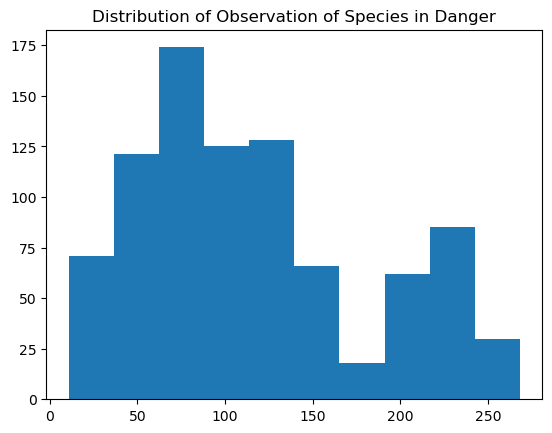

<Figure size 640x480 with 0 Axes>

In [292]:
plt.hist(all_data_in_danger.obs_num)
plt.title('Distribution of Observation of Species in Danger')
plt.show()
plt.clf()

In [293]:
# observations in parks
obs_park = all_data_in_danger.groupby('park_name').obs_num.sum()
print(obs_park)

park_name
Bryce                    18609
Great Smoky Mountains    12816
Yellowstone              44583
Yosemite                 26913
Name: obs_num, dtype: int64


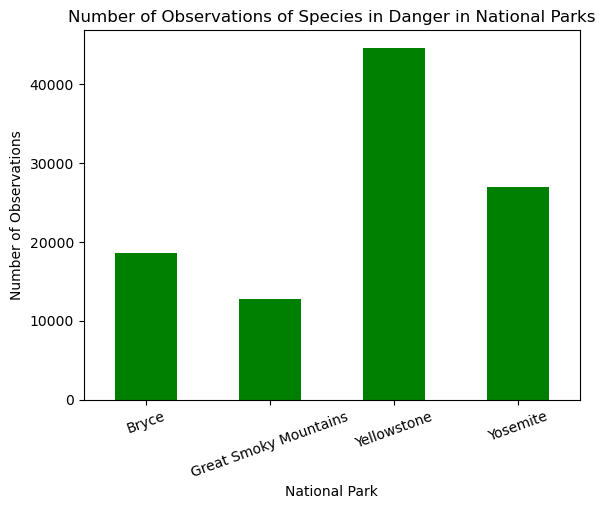

<Figure size 640x480 with 0 Axes>

In [294]:
obs_park.plot(kind='bar', color='green')
plt.title('Number of Observations of Species in Danger in National Parks')
plt.xticks(rotation=20)
plt.xlabel('National Park')
plt.ylabel('Number of Observations')
plt.show()
plt.clf()

The most observations was reported from Yellowstone National Park (44583). From the other parks come around the half of this observations or less than the half: 26913 from Yosemite National Park.    

In [295]:
# observation numbers of categories
obs_category = all_data_in_danger.groupby('category').obs_num.sum()
print(obs_category)

category
Mammal               25146
Bird                 42724
Reptile               2536
Amphibian             2752
Fish                  4209
Vascular Plant       22849
Nonvascular Plant     2705
Name: obs_num, dtype: int64


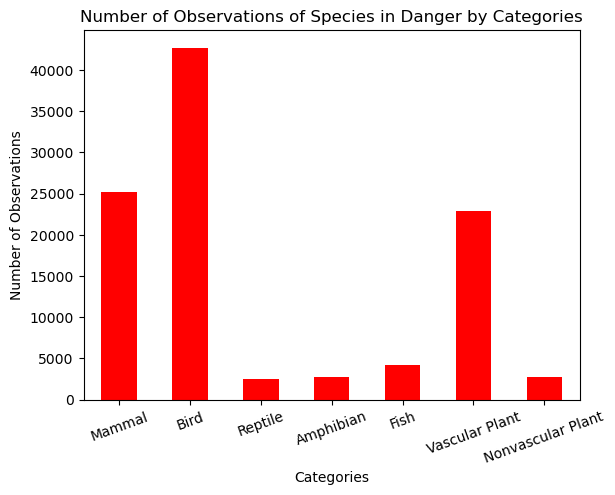

<Figure size 640x480 with 0 Axes>

In [296]:
obs_category.plot(kind='bar', color='red')
plt.title('Number of Observations of Species in Danger by Categories')
plt.xticks(rotation=20)
plt.xlabel('Categories')
plt.ylabel('Number of Observations')
plt.show()
plt.clf()

Among endangered species the most observation referred to birds, followed by mammals and vascular plants. The other categories had a lot less observations.

#### National Parks ####

In [297]:
all_data_in_danger.park_name.value_counts()

Bryce                    220
Yellowstone              220
Great Smoky Mountains    220
Yosemite                 220
Name: park_name, dtype: int64

In [298]:
# number of observationof species in danger in national parks by categories
categories_in_parks = all_data_in_danger.groupby(['park_name', 'category']).agg({'obs_num': 'sum'})

categories_in_parks_pivot= pd.pivot_table(
    data=categories_in_parks,
    values='obs_num',
    index='park_name',
    columns='category',
)
categories_in_parks_pivot

category,Mammal,Bird,Reptile,Amphibian,Fish,Vascular Plant,Nonvascular Plant
park_name,,,,,,,
Bryce,4701,7608,387,498,731,4198,486
Great Smoky Mountains,2951,5297,365,333,547,2950,373
Yellowstone,11030,18526,1100,1167,1875,9716,1169
Yosemite,6464,11293,684,754,1056,5985,677


kiszámolni parkonként a védett állatok százalékát a nem védettekéhez képest
1. mindegyik parknak df: védett-nem védett állatok obs_num
2. százalékok
3. összefoglaló táblázat a százalékokról
scatterplot ebből

In [312]:
park_obs=all_data.groupby(['park_name', 'in_danger']).agg({'obs_num': 'sum'})
park_obs_pivot=pd.pivot_table(
data=park_obs,
columns='in_danger',
index='park_name',
values='obs_num')

park_obs_pivot.columns=['not_in_danger', 'in_danger']
park_obs_pivot.reset_index()
park_obs_pivot['percent']=park_obs_pivot['in_danger']/park_obs_pivot['not_in_danger']*100
park_obs_pivot

,not_in_danger,in_danger,percent
park_name,,,
Bryce,614434,18609,3.028641
Great Smoky Mountains,461163,12816,2.779061
Yellowstone,1540307,44583,2.894423
Yosemite,921547,26913,2.920415


In [ ]:
#create df about endangered species
all_data_endangered = all_data_in_danger[all_data_in_danger['conservation_status']=='Endangered']
all_data_endangered.info()

In [ ]:
all_data_endangered.head(30)

In [ ]:
all_data_endangered['category'].value_counts()

In [ ]:
endangered_obs_parks=all_data_endangered.groupby('park_name').agg({'obs_num':'sum'})
endangered_obs_parks.obs_num.sum()
endangered_obs_parks['percent']=endangered_obs_parks['obs_num']/endangered_obs_parks.obs_num.sum()*100
endangered_obs_parks